In [1]:
import pandas as pd
cereal = pd.read_csv('../data/cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [47]:
obj_types = cereal.dtypes[cereal.dtypes == 'object'].index
cereal = cereal.drop(obj_types, axis=1)
cereal = cereal[cereal['sugars'] >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [48]:
cereal2 = cereal[['sugars', 'rating']].sort_values(by=['sugars'])
cereal2

,sugars,rating
20,0,64.533816
54,0,60.756112
55,0,63.005645
3,0,93.704912
63,0,68.235885
...,...,...
52,14,37.840594
6,14,33.174094
70,14,28.592785
66,15,31.230054


<AxesSubplot:xlabel='sugars', ylabel='rating'>

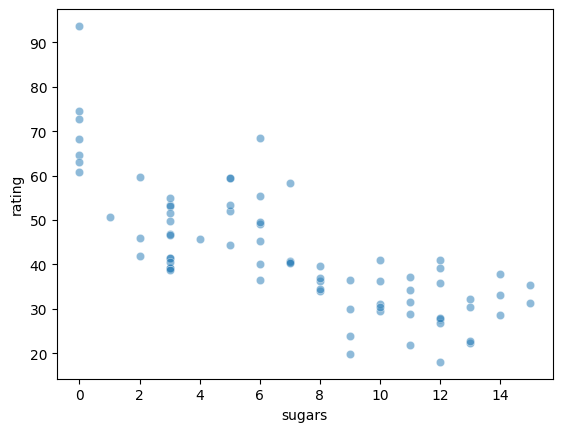

In [49]:
import seaborn as sns

cereal2.reset_index(drop=True, inplace=True)

sns.scatterplot(x='sugars', y='rating', data=cereal2, alpha=0.5)

In [50]:
from sklearn.model_selection import train_test_split
x = cereal2['sugars'].values
y = cereal2['rating'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60,) (60,)
(16,) (16,)


In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

lr_model = LinearRegression()
lr_model.fit(X_poly, y_train)


LinearRegression()

In [52]:
import numpy as np
X_test_poly = poly_reg.transform(x_test.reshape(-1, 1))

pred = lr_model.predict(X_test_poly)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('r2 \t', r2_score(y_test, pred))
print('MSE \t', mean_squared_error(y_test, pred))
print('RMSE \t', np.sqrt(mean_squared_error(y_test, pred)))
print('MAE \t', np.sqrt(mean_absolute_error(y_test, pred)))

r2 	 0.764494704071087
MSE 	 28.635739150783962
RMSE 	 5.351237160767962
MAE 	 2.036628997980462


<AxesSubplot:>

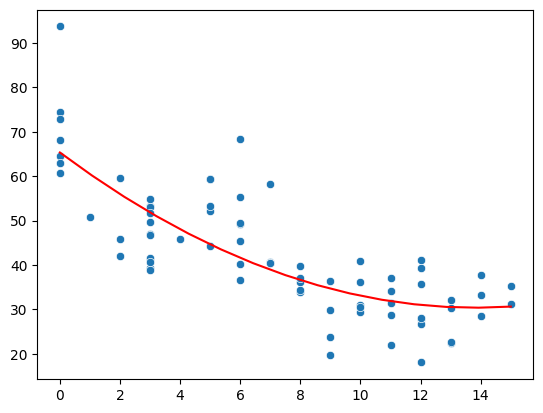

In [53]:
X_new = np.linspace(x.min(), x.max(), 15)
X_new_poly = poly_reg.transform(X_new.reshape(-1, 1))
pred = lr_model.predict(X_new_poly)

sns.scatterplot(x=x, y=y)
sns.lineplot(x=X_new, y=pred, color='red')

In [54]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [56]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]}

gridCV = GridSearchCV(ridge, param_grid=param, cv=4, n_jobs=-1)
gridCV.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]})

In [64]:
pd.DataFrame(gridCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005060,0.001018,0.001375,0.000548,0.001,{'alpha': 0.001},0.470583,0.446066,0.335058,0.583668,0.458844,0.088325,5
1,0.003195,0.001101,0.001633,0.001132,0.005,{'alpha': 0.005},0.471329,0.449227,0.339897,0.582081,0.460634,0.085981,4
2,0.001584,0.000059,0.000928,0.000015,0.01,{'alpha': 0.01},0.472184,0.450627,0.343261,0.580688,0.461690,0.084289,3
3,0.001381,0.000104,0.000873,0.000028,0.05,{'alpha': 0.05},0.477381,0.448822,0.358643,0.571556,0.464101,0.075957,1
4,0.001383,0.000060,0.000875,0.000022,0.1,{'alpha': 0.1},0.480755,0.441268,0.370590,0.559877,0.463123,0.068396,2
5,0.001261,0.000089,0.000850,0.000005,0.5,{'alpha': 0.5},0.459000,0.370742,0.381870,0.473640,0.421313,0.045474,6
6,0.001314,0.000047,0.000839,0.000013,1,{'alpha': 1},0.407986,0.305691,0.353329,0.400013,0.366755,0.040973,7
7,0.001310,0.000068,0.000879,0.000084,2,{'alpha': 2},0.320032,0.222974,0.296217,0.310940,0.287541,0.038234,8


In [69]:
gridCV.best_estimator_.coef_

array([ -16.56019478, -259.27062757,  544.95917772,  325.95640818,
        -85.5432078 ,  -73.60430952, -207.77960942,   91.24638984,
        429.42565511,  100.31069762])